# Creation a language translator based on seq2seq on word level tokenization
**Version 12**: First functioning model based on **word level** translation
- This model translates from English to Danish
- The model below works!
- It is a minimum solution when it comes to the neural network itself. I only consists of on LSTM mayer in the encoder and the decoder. But it seems to work OK well! Below is tree translation tests based on: 
    - traing data (shall work!)
    - validation data (shoud work OK?)
    - my own new sentences (will it work?)
- The goal as to create a work ing model. The next goal is to develop it further, so i can handle more advanced texts

Improvments to be implemented:
- Operates right now with long sentences: 8*std_div, shound be less when longer sentences are trained
- deeper models to represent more complex sentences, more LSTM layers?
- Bi-directional layers
- model.fit_generator to handle larger datasets
- Attention 

Credits to many fine people on the internet:
- https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html
- https://medium.com/@dev.elect.iitd/neural-machine-translation-using-word-level-seq2seq-model-47538cba8cd7
- https://stackoverflow.com/questions/49477097/keras-seq2seq-word-embedding
- https://github.com/devm2024/nmt_keras/blob/master/base.ipynb

In [1]:
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import numpy as np

C:\Users\ThomasGordon\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# global variables

num_samples = 100000       # Number of samples to train on
num_words = 10000          # Limit vocabulary in translation
latent_dim = 256           # Latent dimensionality of the encoding space

batch_size = 512           # Batch size for training.
numEpochs = 100            # Number of epochs to train for.

truncate_std_div = 99      # truncate sentences after x tokens
mark_start = 'ssss '       # start and end markes for destination sentences
mark_end = ' eeee'

data_path = 'dan-eng/dan.txt'

### Read training data into tables

In [3]:
# Read data into tables
input_texts = []
target_texts = []

with open(data_path, 'r', encoding='utf-8') as f:
    lines = f.read().split('\n')

for line in lines[: min(num_samples, len(lines) - 1)]:
    input_sentence, target_sentence = line.split('\t')
    target_sentence = mark_start + target_sentence.strip() + mark_end
    input_texts.append(input_sentence)
    target_texts.append(target_sentence)

# Examples
print(input_texts[15:20])
print(target_texts[15:20])

['No way!', 'No way!', 'No way!', 'No way!', 'No way!']
['ssss Aldrig i livet! eeee', 'ssss Ikke tale om! eeee', 'ssss Absolut ikke! eeee', 'ssss Under ingen omstændigheder! eeee', 'ssss Aldrig i verden! eeee']


### Tokenize input sentences

In [4]:
# crate input tokenizer and create vocabulary from the texts
tokenizer_inp = Tokenizer(num_words=num_words)
tokenizer_inp.fit_on_texts(input_texts)
print('Found %s unique source tokens.' % len(tokenizer_inp.word_index))

# translate from word sentences to token sentences
tokens_inp = tokenizer_inp.texts_to_sequences(input_texts)

# Shorten the longest token sentences, Find the length of all sentences, truncate after x * std deviations
num_tokens = [len(x) for x in tokens_inp]
print('Longest sentence is %s tokens.' % max(num_tokens))
max_tokens_input = np.mean(num_tokens) + truncate_std_div * np.std(num_tokens)
max_tokens_input = min(int(max_tokens_input), max(num_tokens))
print('Sentences shortened to max %s tokens.' % max_tokens_input)

# Pad / truncate all token-sequences to the given length
tokens_padded_input = pad_sequences(tokens_inp,
                                    maxlen=max_tokens_input,
                                    padding='post',
                                    truncating='post')
print('Shape of input tokens:', tokens_padded_input.shape)
print('Input example: ', tokens_padded_input[10000])

# Create inverse lookup from integer-tokens to words
index_to_word_input = dict(zip(tokenizer_inp.word_index.values(), tokenizer_inp.word_index.keys()))

# function to return readable text from tokens string
def tokens_to_string_inp(tokens):
    words = [index_to_word_input[token] 
            for token in tokens
            if token != 0]
    text = " ".join(words)
    return text

# demo to show that it works
idx = 10000
print(tokens_to_string_inp(tokens_padded_input[idx]))
print(input_texts[idx])
print(tokens_padded_input[idx])

Found 5293 unique source tokens.
Longest sentence is 24 tokens.
Sentences shortened to max 24 tokens.
Shape of input tokens: (14839, 24)
Input example:  [   1   73    6   29  531 1326  360    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]
the apple is not quite ripe yet
The apple is not quite ripe yet.
[   1   73    6   29  531 1326  360    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]


### Tokenize destination sentences

In [5]:
# crate input tokenizer and create vocabulary from the texts
tokenizer_target = Tokenizer(num_words=num_words)
tokenizer_target.fit_on_texts(target_texts)
print('Found %s unique target tokens.' % len(tokenizer_target.word_index))

# translate from word sentences to token sentences
tokens_target = tokenizer_target.texts_to_sequences(target_texts)

# translate from word sentences to token sentences
tokens_target = tokenizer_target.texts_to_sequences(target_texts)

# Shorten the longest token sentences, Find the length of all sentences, truncate after x * std deviations
num_tokens = [len(x) for x in tokens_target]
print('Longest sentence is %s tokens.' % max(num_tokens))
max_tokens_target = np.mean(num_tokens) + truncate_std_div * np.std(num_tokens)
max_tokens_target = min(int(max_tokens_target), max(num_tokens))
print('Sentences shortened to max %s tokens.' % max_tokens_target)

# Pad / truncate all token-sequences to the given length
tokens_padded_target = pad_sequences(tokens_target,
                                     maxlen=max_tokens_target,
                                     padding='post',
                                    truncating='post')
print('Shape of target tokens:', tokens_padded_target.shape)
print('Target example: ', tokens_padded_target[10000])

# Create inverse lookup from integer-tokens to words
index_to_word_target = dict(zip(tokenizer_target.word_index.values(), tokenizer_target.word_index.keys()))

# function to return readable text from tokens string
def tokens_to_string_target(tokens):
    words = [index_to_word_target[token] 
            for token in tokens
            if token != 0]
    text = " ".join(words)
    return text

# demo to show that it works
idx = 10000
print(tokens_to_string_target(tokens_padded_input[idx]))
print(target_texts[idx])
print(tokens_padded_target[idx])

Found 7070 unique target tokens.
Longest sentence is 29 tokens.
Sentences shortened to max 29 tokens.
Shape of target tokens: (14839, 29)
Target example:  [   1  308    3   10  194 2333  273    2    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
ssss tror at den problemer faldet 30
ssss Æblet er ikke helt modent endnu. eeee
[   1  308    3   10  194 2333  273    2    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]


In [6]:
# start and end marks as tokens, needed when translating
token_start = tokenizer_target.word_index[mark_start.strip()]
token_end = tokenizer_target.word_index[mark_end.strip()]
print(token_start, token_end)

1 2


### Traing data
- Input to the encoder is simply the source language as it is
- Inputs to the decoder are slightly more complicated, since the two input strings are shiften one time-step: The model has to learn to predict the "next" token in the output from the input. Slizing is used to get two "views" to the data

In [7]:
encoder_input_data = tokens_padded_input
encoder_input_data.shape

(14839, 24)

In [8]:
decoder_input_data = tokens_padded_target[:, :-1]
decoder_input_data.shape

(14839, 28)

In [9]:
decoder_target_data = tokens_padded_target[:, 1:]
decoder_target_data.shape

(14839, 28)

Examples showing the training data to the model

In [10]:
encoder_input_data[idx]

array([   1,   73,    6,   29,  531, 1326,  360,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0])

In [11]:
decoder_input_data[idx]

array([   1,  308,    3,   10,  194, 2333,  273,    2,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

In [12]:
decoder_target_data[idx]

array([ 308,    3,   10,  194, 2333,  273,    2,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

One-hot encode 'decoder_target_data' since this is what the decoder produces as output

In [13]:
decoder_target_data_onehot = np.zeros((decoder_target_data.shape[0], decoder_target_data.shape[1], num_words), dtype=bool)
for i, sentence in enumerate(decoder_target_data):
    for j, token in enumerate(sentence):
        decoder_target_data_onehot[i, j, token] = 1

In [14]:
# worried about the menory usage ...
from sys import getsizeof
SizeInMB = getsizeof(decoder_target_data_onehot) / 1024 / 1024
print('Reality check: Size of one-hot tensor in MB:', SizeInMB)

Reality check: Size of one-hot tensor in MB: 3962.4406127929688


### Create training model

In [15]:
# Define an input sequence and process it
encoder_inputs = Input(shape=(None,))

encoder_embed =       Embedding(num_words, latent_dim)
encoder_embed_final = encoder_embed(encoder_inputs)

encoder =                           LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_embed_final)

encoder_states =      [state_h, state_c]           # we just need the encoder states

In [16]:
# Set up the decoder, using `encoder_states` as initial state
decoder_inputs = Input(shape=(None,))

decoder_embed = Embedding(num_words, latent_dim)
decoder_embed_final = decoder_embed(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embed_final, initial_state=encoder_states)

decoder_dense = Dense(num_words, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 256)    2560000     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 256)    2560000     input_2[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LS

### Train the model

In [17]:
# Compile & run training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [18]:
#    , metrics=['accuracy']

In [19]:
# Note that `decoder_target_data` needs to be one-hot encoded,
# rather than sequences of integers like `decoder_input_data`!
history = model.fit([encoder_input_data, decoder_input_data], decoder_target_data_onehot,
                    batch_size=batch_size,
                    epochs=numEpochs,
                    validation_split=0.2)
model.save('TGC_trans_11.h5')

Train on 11871 samples, validate on 2968 samples
Epoch 1/100
11871/11871 [==============================] - 35s 3ms/step - loss: 3.0020 - val_loss: 2.5604
Epoch 2/100
11871/11871 [==============================] - 28s 2ms/step - loss: 1.3164 - val_loss: 2.4383
Epoch 3/100
11871/11871 [==============================] - 28s 2ms/step - loss: 1.2184 - val_loss: 2.3599
Epoch 4/100
11871/11871 [==============================] - 29s 2ms/step - loss: 1.1475 - val_loss: 2.2776
Epoch 5/100
11871/11871 [==============================] - 29s 2ms/step - loss: 1.1082 - val_loss: 2.2511
Epoch 6/100
11871/11871 [==============================] - 28s 2ms/step - loss: 1.0817 - val_loss: 2.2424
Epoch 7/100
11871/11871 [==============================] - 28s 2ms/step - loss: 1.0584 - val_loss: 2.2221
Epoch 8/100
11871/11871 [==============================] - 28s 2ms/step - loss: 1.0371 - val_loss: 2.2650
Epoch 9/100
11871/11871 [==============================] - 28s 2ms/step - loss: 1.0157 - val_loss: 2.23

11871/11871 [==============================] - 28s 2ms/step - loss: 0.2165 - val_loss: 2.1019
Epoch 78/100
11871/11871 [==============================] - 28s 2ms/step - loss: 0.2098 - val_loss: 2.1007
Epoch 79/100
11871/11871 [==============================] - 28s 2ms/step - loss: 0.2043 - val_loss: 2.1345
Epoch 80/100
11871/11871 [==============================] - 28s 2ms/step - loss: 0.1985 - val_loss: 2.1224
Epoch 81/100
11871/11871 [==============================] - 28s 2ms/step - loss: 0.1935 - val_loss: 2.1337
Epoch 82/100
11871/11871 [==============================] - 28s 2ms/step - loss: 0.1870 - val_loss: 2.1325
Epoch 83/100
11871/11871 [==============================] - 28s 2ms/step - loss: 0.1821 - val_loss: 2.1353
Epoch 84/100
11871/11871 [==============================] - 28s 2ms/step - loss: 0.1763 - val_loss: 2.1097
Epoch 85/100
11871/11871 [==============================] - 28s 2ms/step - loss: 0.1714 - val_loss: 2.1573
Epoch 86/100
11871/11871 [========================

C:\Users\ThomasGordon\Anaconda3\lib\site-packages\keras\engine\topology.py:2368: UserWarning: Layer lstm_2 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'lstm_1/while/Exit_2:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'lstm_1/while/Exit_3:0' shape=(?, 256) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  str(node.arguments) + '. They will not be included '


In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'loss'])

In [21]:
import matplotlib.pyplot as plt
plt.show()

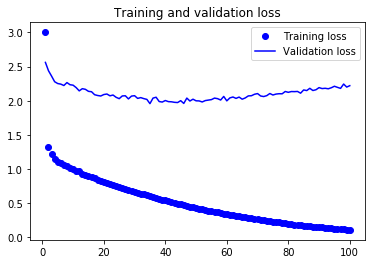

In [22]:
# plotter historikken for 'loss'
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, numEpochs+1)
plt.plot(epochs, loss, 'bo', label='Training loss')       # bo = "blue dot"
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # b  = "solid blue line"
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Inference mode = testing the model

### create sampling model

In [23]:
# encoder model used to create internal representation / states
encoder_model = Model(encoder_inputs, encoder_states)
encoder_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                [(None, 256), (None, 256) 525312    
Total params: 3,085,312
Trainable params: 3,085,312
Non-trainable params: 0
_________________________________________________________________


In [24]:
# create decoder model used to iteratively generate word by word
# define internal states (internal representation of sentence to be translated)
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# reuse the decoder we have trained
decoder_embed_final2 = decoder_embed(decoder_inputs)

decoder_outputs2, state_h2, state_c2 = decoder_lstm(decoder_embed_final2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

decoder_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 256)    2560000     input_2[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 256)          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 256)          0                                            
__________________________________________________________________________________________________
lstm_2 (LS

### Function to translate based on the inference model

In [25]:
def decode_sequence(input_seq):
   
    # tokenize the text to be translated, and reverse
    input_tokens = tokenizer_inp.texts_to_sequences([input_seq])
    input_tokens = pad_sequences(input_tokens,
                                 maxlen=max_tokens_input,
                                 padding='post',
                                 truncating='post')

    # encode the input sentence
    states_value = encoder_model.predict(input_tokens)
    
    # Generate empty target sequence of length 1 and insert start token
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = token_start    #

    # sampling loop to generate translated words using decoder, word by word
    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:  
        # predict one next word, decoder returns probabilities for all words/tokens
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        
        # pick most probable token / word
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = index_to_word_target[sampled_token_index]
        decoded_sentence += ' '+sampled_word
        
        # Exit condition: either hit max length or find stop character.
        if (sampled_word == 'eeee' or len(decoded_sentence) > 52):
            stop_condition = True
        
        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        
        # Update states, so they can be re-injected in next token/word prediction
        states_value = [h, c]

    return decoded_sentence

### Doing translation ...

In [33]:
# testing on known sentences from training data
for idx in range(10000, 10200):
    input_seq = input_texts[idx]
    decoded_sentence = decode_sequence(input_seq)
    print(input_seq, decoded_sentence, '\n')

The apple is not quite ripe yet.  æblet er ikke modent endnu eeee 

The bicycle by the door is mine.  katten klatrede op i træet eeee 

The bottle is filled with water.  anden lektion er let eeee 

The boy has a bat under his arm.  drengen har et bat under armen eeee 

The cat is sitting on the table.  katten fangede rotterne eeee 

The city has a large population.  byen har mange indbyggere eeee 

The company was founded in 1974.  skoene er udslidte eeee 

The customer isn't always right.  kunden har ikke altid ret eeee 

The difficult question is where.  det vanskelige spørgsmål er hvor eeee 

The dogs bayed at the full moon.  hundene gøede ad fuldmånen eeee 

The dogs started barking at Tom.  hundene begyndte at gø ad tom eeee 

The early bird catches the worm.  damerne havde aftenkjoler eeee 

The fire was on the first floor.  skibet var på den sal eeee 

The food didn't taste very good.  maden smagte ikke særligt godt eeee 

The forest is teeming with life.  skoven vrimler med liv

We advertise our products on TV.  vi så tårnet i morgen og det kan ikke eeee 

We advertise our products on TV.  vi så tårnet i morgen og det kan ikke eeee 

We are in a difficult situation.  er i et eller andet sted på biblioteket eeee 

We gave blood to help the child.  vi gav dig den her eeee 

We have a cat. We all love cats.  vi har en god gruppe af frivillige eeee 

We have a stock of toilet paper.  vi har en beholdning af wc papir eeee 

We have a stock of toilet paper.  vi har en beholdning af wc papir eeee 

We have a stock of toilet paper.  vi har en beholdning af wc papir eeee 

We have a stock of toilet paper.  vi har en beholdning af wc papir eeee 

We hurried to the train station.  vi skyndte os til stationen eeee 

We hurried to the train station.  vi skyndte os til stationen eeee 

We must've taken the wrong road.  vi må have taget den forkerte vej eeee 

We often talk about the weather.  vi taler tit om vejret eeee 

We saw many ships in the harbor.  vi så mange skibe 

In [34]:
# testing on known sentences from validation data
for idx in range(11000, 12100):
    input_seq = input_texts[idx]
    decoded_sentence = decode_sequence(input_seq)
    print(input_seq, decoded_sentence, '\n')

Don't use slang if you can help it.  ikke alle kan hjælpe dig på eeee 

Don't use slang if you can help it.  ikke alle kan hjælpe dig på eeee 

For goodness' sake, don't say that!  for guds skyld sig ikke det eeee 

For goodness' sake, don't say that!  for guds skyld sig ikke det eeee 

Have you stopped beating your wife?  er du sikker på du har brug for noget hjælp eeee 

He doesn't watch television at all.  han ser slet ikke fjernsyn eeee 

He got out of the habit of smoking.  han havde vænnet sig af med at ryge eeee 

He hid himself behind a large rock.  han gemte sig bag en stor sten eeee 

He hid himself behind a large rock.  han gemte sig bag en stor sten eeee 

He is not interested in art at all.  han er ikke for at blive ved at være til vores arbejde 

He knows nothing about electronics.  han ved intet om elektronik eeee 

He made a mistake and drank poison.  han har en kat og to katte eeee 

He made up his mind to be a doctor.  han besluttede sig for at blive læge eeee 

He pr

Let me have a little chat with Tom.  lad mig få en lille snak med tom eeee 

Let's pick flowers from the garden.  lad os plukke blomster fra haven eeee 

Mary asked Tom to zip up her dress.  mary bad tom om at lyne hendes kjole op eeee 

Mr. Jackson is a very good teacher.  hr jackson er en meget god lærer eeee 

My dog often pretends to be asleep.  min mand er til at se en løgn eeee 

My family goes to Italy every year.  min familie tager til italien hvert år eeee 

My family goes to Italy every year.  min familie tager til italien hvert år eeee 

My guess is that it will rain soon.  mit gæt er at det snart vil regne eeee 

My hobby is collecting old bottles.  min hobby er at samle på gamle flasker eeee 

My mother made me a Christmas cake.  min mor lavede en julekage til mig eeee 

My sister is a very beautiful girl.  min kone er en god kok eeee 

My sister is older than my brother.  min søster er ældre end min bror eeee 

Nearly all Japanese have dark hair.  alt syntes at være i ord

Tom is lying face down in the sand.  tom ligger med ansigtet nedad i sandet eeee 

Tom is obviously in love with Mary.  tom er tydeligvis forelsket i mary eeee 

Tom is surprisingly good at French.  tom er god til fransk eeee 

Tom is trying to do the impossible.  tom forsøger at gøre det umulige eeee 

Tom likes to do things his own way.  tom kan lide at gøre tingene på sin egen måde eeee 

Tom loved apples when he was a kid.  tom er på sit værelse eeee 

Tom never forgets a name or a face.  tom har aldrig fortalt mig et brev eeee 

Tom played the piano and Mary sang.  tom spillede hamlet eeee 

Tom promised he'd go straight home.  tom lovede at han ville gå til vores fest eeee 

Tom remained single his whole life.  tom forblev single hele sit liv eeee 

Tom remained single his whole life.  tom forblev single hele sit liv eeee 

Tom said he was going to help Mary.  tom sagde at han ville hjælpe mary eeee 

Tom said he was going to kill Mary.  tom sagde at han ville dræbe mary eeee 

T

Everybody knows that you are a liar.  alle ved du er en løgnhals eeee 

Everyone in the town knows about it.  alle i byen kender til det eeee 

Grandmother sent us a box of apples.  bedstemor har sendt os en kasse æbler eeee 

Grandmother sent us a box of apples.  bedstemor har sendt os en kasse æbler eeee 

Have you heard her speaking English?  har du hørt hende tale engelsk eeee 

He asked Lincoln to say a few words.  han bad lincoln sige nogle ord eeee 

He comes to see my son now and then.  han kommer til boston hver morgen hele dagen eeee 

He couldn't understand the sentence.  han kunne ikke holde op med at hoste eeee 

He decided not to go to the meeting.  han besluttede sig for ikke at gå til mødet eeee 

He did nothing but watch TV all day.  han ser slet ikke fjernsyn eeee 

He has a lot of teaching experience.  han har meget erfaring i at undervise eeee 

He is used to talking to foreigners.  han har et billede op i at blive eeee 

He looked as if he had seen a ghost.  han så

It takes courage to do such a thing.  det vil aldrig være for sent eeee 

It takes time to get over a divorce.  det bliver tid at jeg få en uge siden eeee 

It was so boring that I fell asleep.  det var så kedeligt at jeg faldt i søvn eeee 

It will cost around fifteen dollars.  det vil koste cirka femten dollar eeee 

It's a long way from here to school.  det er en kirke her i mit kjole eeee 

Japan and South Korea are neighbors.  japan og sydkorea er nabolande eeee 

Kimchi is a traditional Korean dish.  kimchi er en traditionel koreansk ret eeee 

Kyoto is famous for its old temples.  den nye hovedkontor ligger i tokyo eeee 

Let's drink to our charming hostess!  lad os få en snak med tom eeee 

Let's get together and talk it over.  lad os sætte os ned og snakke om det eeee 

Let's make the world a better place.  lad os få fat for et kort til dig eeee 

Let's visit my grandpa this weekend.  lad os få fat i en hammer og i denne hånd eeee 

Life is short, but it's long enough.  livet 

Tom handed the empty bottle to Mary.  tom rakte mary for mary eeee 

Tom handed the empty bottle to Mary.  tom rakte mary for mary eeee 

Tom has a drawer full of USB cables.  tom har en skuffe fuld af usb kabler eeee 

Tom has nothing in common with Mary.  tom har intet tilfælles med mary eeee 

Tom has nothing in common with Mary.  tom har intet tilfælles med mary eeee 

Tom has three cars and a motorcycle.  tom har tre biler og en motorcykel eeee 

Tom heard a cat meowing in the tree.  tom har en hund og en kat eeee 

Tom is buying a new house next year.  tom har et dårligt syn eeee 

Tom is the father of three children.  tom er min far i haven eeee 

Tom is the oldest of the three boys.  tom er den ældste af de der eeee 

Tom is the son of a race car driver.  tom er en af ​​mine nærmeste venner eeee 

Tom just told me about the accident.  tom har lige fortalt mig om ulykken eeee 

Tom made a complete fool of himself.  tom gjorde sig selv til grin eeee 

Tom put the bowl into the mi

Don't knock it until you've tried it.  lad være med at rakke noget ned før du har prøvet det 

Don't you know how beautiful you are?  du kan ikke læse elevatoren eeee 

Don't you want to know what it means?  vil du ikke vide hvad det betyder eeee 

Don't you want to know what it means?  vil du ikke vide hvad det betyder eeee 

Foreigners often feel unwelcome here.  udlændinge føler sig ofte uvelkomne her eeee 

From now on, we'll only speak French.  de sagde til at tale fransk eeee 

Have you ever seen Buckingham Palace?  har du nogensinde set buckingham palace eeee 

He appeared on television last night.  han var i fjernsynet i aftes eeee 

He appeared on television last night.  han var i fjernsynet i aftes eeee 

He appeared on television last night.  han var i fjernsynet i aftes eeee 

He broke one of the bones in his leg.  han har ryddet op på sit værelse eeee 

He can speak both English and French.  han kan tale fransk og engelsk eeee 

He died before the ambulance arrived.  han d

If you have something to say, say it.  der er noget jeg kunne have så til at se eeee 

In October, the leaves begin to fall.  i oktober begynder bladene at falde eeee 

Is she satisfied with her daily life?  er hun tilfreds med sin hverdag eeee 

Is there a bus that goes to the mall?  er der en bus der kører til indkøbscentret eeee 

Is there a bus that goes to the mall?  er der en bus der kører til indkøbscentret eeee 

Is there a bus that goes to the mall?  er der en bus der kører til indkøbscentret eeee 

Is there a bus that goes to the mall?  er der en bus der kører til indkøbscentret eeee 

Is there a bus that goes to the mall?  er der en bus der kører til indkøbscentret eeee 

Is there a bus that goes to the mall?  er der en bus der kører til indkøbscentret eeee 

Is there any chance that Tom can win?  er der noget andet at gøre sådan et problem eeee 

It took me some time to persuade her.  det tog mig for meget over tid til mig eeee 

It was dark when I reached the hotel.  det v

Tom and Mary will keep their promise.  tom og mary spiser ikke længere eeee 

Tom asked Mary whether she liked him.  tom spurgte mary om hun kunne lide ham eeee 

Tom bought three kilograms of apples.  tom købte tre kilogram æbler eeee 

Tom bought three kilograms of apples.  tom købte tre kilogram æbler eeee 

Tom came close to being hit by a car.  tom var tæt på at blive ramt af en bil eeee 

Tom can't decide which camera to buy.  tom kan ikke bestemme sig for en af siden af eeee 

Tom comes to Boston every two months.  tom kommer til boston hver anden måned eeee 

Tom commutes to work on a motorcycle.  tom pendler til arbejde på motorcykel eeee 

Tom cut himself on some broken glass.  tom skar sig på nogle glasskår eeee 

Tom doesn't go out with Mary anymore.  tom siger ikke han har ikke travlt eeee 

Tom has a pizza oven in his backyard.  tom har en ti gears cykel eeee 

Tom has just finished washing dishes.  tom har fået noget til at læse eeee 

Tom hates the sound of his own voic

He said he would come and he did come.  han sagde at han ville komme til ham eeee 

He took a shortcut through the forest.  han tog en dyb indånding eeee 

He was mad because he was not invited.  han var meget tilfreds med resultatet eeee 

He was tired, so he went to bed early.  han var så træt og han kommer tilbage eeee 

He who pays the piper, calls the tune.  den der betaler musikken bestemmer melodien eeee 

He'll run out of luck sooner or later.  han vil få fat på det eeee 

Helen Keller was blind, deaf and dumb.  det var mørkt da han bliver eeee 

Helen Keller was blind, deaf and mute.  det var mørkt da han bliver eeee 

His days as a politician are numbered.  den mand er en klog ved han ikke eeee 

His secretary seems to know the truth.  han elsker at se dig igen eeee 

His theory is difficult to understand.  denne telefon er i uorden eeee 

How did people know I wasn't Canadian?  hvordan sagde jeg til dig at han ikke eeee 

How did you spend your summer holiday?  hvordan har d

She told him that her father had died.  hun sagde at hun var læge eeee 

She was dressed in white at the party.  hun var klædt i sort et år siden eeee 

Since when do you care about politics?  hvornår skal du giftes eeee 

Since when do you care about politics?  hvornår skal du giftes eeee 

Someone told me you left your husband.  hvem har brug for dig hjælp eeee 

Someone told me you left your husband.  hvem har brug for dig hjælp eeee 

Speak louder so everyone can hear you.  hvorfor har du så godt som det gør tom eeee 

The Titanic sunk on its maiden voyage.  pas på hunder bider eeee 

The accident almost cost him his life.  kig på himlen eeee 

The boy released a bird from the cage.  drengen har et bat under armen eeee 

The boy standing over there is my son.  drengen skar sit navn i træet eeee 

The circus will come to town tomorrow.  ring til hende i morgen eeee 

The heavy rain kept us from going out.  dette ville forstå sand eeee 

The heavy rain kept us from going out.  dette 

In [32]:
input_seq = 'see you later'
decoded_sentence = decode_sequence(input_seq)
print(input_seq, decoded_sentence, '\n')

see you later  vi ses eeee 

